# Word Cloud

You've likely seen word-clouds before, if not, please check [here](https://www.google.com/search?site=&tbm=isch&source=hp&biw=1536&bih=799&q=word+cloud&oq=word+cloud&gs_l=img.3..0l10.981.2160.0.2280.11.11.0.0.0.0.95.704.9.9.0....0...1.1.64.img..2.9.695.0.NtfMDYloQTw) for examples. In order to create word clouds, the software finds the most frequently occurring words in a text file. Our mini-programming assignment will ask you to do just that. We'll use the text of the famous novel by Charles Dickens, A Tale of Two Cities, in our example, but you can use any text you'd like. 

**Part 1: Writing and running python code**

Make sure you have the environment for the course already setup.  If not, please see the instructions at the end of Week 1.
Feel free to create a python program using a text editor (nano) or you can do all the work in python shell.  Or, if you already have some experience in Jupyter, feel free to do your work there instead. We don't want to be prescriptive here, however you'd like to get started programming is fine. We'll be working in Jupyter from this week on, so this assignment is just to get a little practice in python programming.

**Part 2: Grab source files**

[Download the source files here.](https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/b373c297be36d3ac1cc9452cfa3807e8/asset-v1:UCSanDiegoX+DSE200x+2T2017+type@asset+block/word_cloud.zip)

Included in the source files are:

1. word_cloud.py <- Starter file if you wish to use it

2. Tale.txt <- Tale of Two Cities, by Charles Dickens. Credit to [Project Gutenberg.](https://www.gutenberg.org/)

3. stopwords <- common words to exclude. Credit to [Andreas Mueller.](https://github.com/amueller/word_cloud/)

Note that we could use the nltk stopwords instead of those provided. You should feel free to do so if you wish.

**Part 3: Word Count**

To complete this assignment, you will want to read and clean the input, then count the frequencies of each word. Remember that the data science process involves some pre-processing, then consists of some analysis itself. 
Optionally, you can also filter out common words (“the”, “this”, “and”, etc.) by excluding words which appear in the stopwords file.

Overall, your approach will be:
* Create a data structure to store the words and the number of occurrences of the word.
* Read in each word from the file, making it lower case and removing punctuation. (Optionally, skip common words).
    *  For each remaining word, add the word to the data structure or update your count for the word
* Extract the top ten most frequently occurring words from your data structure and print them, along with their frequencies.
Checking your solution:

You will get different counts on words depending on what punctuation you remove, what stop words you use, etc.  So don't worry too much about getting the exact count we have.  But if you want to see what we found, here are two examples:

Without using stop words and removing the punctuation (. , " “ ), the top 10 most common words should be:

* the : 8177 
* and : 4984 
* of : 4122 
* to : 3536 
* a : 2976 
* in : 2612 
* his : 1998 
* it : 1879 
* i : 1872 
* that : 1861

Using the stop words and removing the punctuation (. , " “ ), the top 10 most common words should be:

* said : 642 
* mr : 616 
* one : 420 
* lorry : 313 
* will : 290 
* upon : 289 
* little : 264 
* man : 259 
* defarge : 259 
* time : 236

**Note, at least "said" and "mr" seem to be common words. Feel free to add more to your stopwords file if you wish to get to less common words.**


**Hints**

1. Which Data Structure? If you aren't sure which data structure to use, remember that we discussed a data structure this week that gives us a key and a value at that key (dictionaries). This could be really useful here.

2.  Stripping off Punctuation.  The command "replace" on a string will replace one letter with another.  For example:

    `word = word.replace(".","")  # Will remove any periods from the word.`

3.  Sorting the data structure.  If you used an unordered data structure like a dictionary, you might need get the values out of it (into a list) to sort it.  You could also use "collections.Counter" to help with this step.

In [1]:
# Be sure you have followed the instructions to download the 98-0.txt,
# the text of A Tale of Two Cities, by Charles Dickens

import collections

file=open('./data/Tale.txt',encoding='utf-8')

# if you want to use stopwords, here's an example of how to do this
stopwords = set(line.strip() for line in open('./data/stopwords'))

# create your data structure here.  F
wordcount={}

# Instantiate a dictionary, and for every word in the file, add to 
# the dictionary if it doesn't exist. If it does, increase the count.

# Hint: To eliminate duplicates, remember to split by punctuation, 
# and use case demiliters. The functions lower() and split() will be useful!

for word in file.read().lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

# after building your wordcount, you can then sort it and return the first
# n words.  If you want, collections.Counter may be useful.

d = collections.Counter(wordcount)

#print(d.most_common(10))
for word, count in d.most_common(10):
    print(word, ": ", count)



said :  642
mr :  616
one :  420
lorry :  313
will :  290
upon :  289
little :  264
man :  259
defarge :  259
time :  236


** Installing wordcloud Module **

I solved my issue using wheels. Here are the steps:

* Download the .whl file compatible with your Python version and your windows distribution (32bit or 64bit) from [here](http://www.lfd.uci.edu/~gohlke/pythonlibs/#wordcloud)
* cd to the file path
* Run this command `python -m pip install <filename>`
* This installed worcloud 1.3.1.

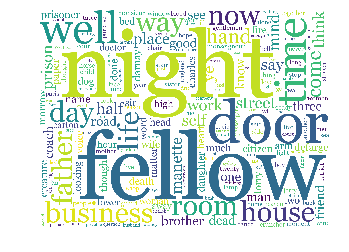

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Convert all the required text into a single string here 
#and store them in text

text = ', '.join("{}".format(key) for key in d.keys())
#print (text)

#you can specify fonts, stopwords, background color and other options

wordcloud = WordCloud(font_path='C:/Windows/Fonts/Georgia.ttf',
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1600,
                          height=1200,
                          relative_scaling = 0.15,
                         ).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()